<a href="https://colab.research.google.com/github/Slrosales/Programacion_con_Python/blob/main/M%C3%B3dulo%202/Flask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller de Desarrollo Web con Flask: Creando una Aplicación de Pokedex

Bienvenidos al taller de Flask donde aprenderemos a construir una aplicación web inspirada en la Pokedex de Pokémon. Tambien se le permitirá a los usuarios registrarse, iniciar sesión y gestionar su propia colección de información sobre Pokémon.

**Objetivos del taller:**
- Entender y aplicar los fundamentos de Flask, un microframework de Python para el desarrollo web.
- Aprender a utilizar SQLite como sistema de gestión de bases de datos para almacenar y gestionar datos de usuario y Pokémon.
- Implementar funcionalidades de autenticación y gestión de sesiones en una aplicación web.
- Desarrollar habilidades en la estructuración de proyectos, escritura de código limpio y depuración de aplicaciones web.


**Requisitos previos:**
- Conocimientos básicos de programación en Python.
- Uso de Google Colab
- Uso de entorno local
- Instalación de Python y pip en su computadora.
- Visual Studio Code o cualquier otro IDE de su preferencia configurado para trabajar con Python. Incluso Bloc de Notas.



# Parte 1: Transformacion de csv a SQLite DB

## ¿Qué es SQLite?

SQLite es un sistema de gestión de bases de datos relacional. Es famoso por ser extremadamente ligero y portátil, pero a la vez sorprendentemente potente y capaz de manejar una gran cantidad de operaciones de base de datos.

**Características clave de SQLite:**

- **Autónomo:** SQLite no requiere un sistema de gestión de base de datos separado. Se integra directamente en las aplicaciones que lo utilizan, lo que significa que no necesita configuración ni administración de un servidor de base de datos. Es como un archivo más del sistema.
- **Sin configuración:** No se necesita ninguna configuración o instalación para comenzar a usar SQLite, lo que lo hace ideal para aplicaciones que necesitan ser ligeras y flexibles.
- **Transaccional:** SQLite es transaccional, lo que significa que todas las operaciones son ACID-compliant. Esto asegura que los datos sean consistentes, incluso en casos de interrupción del sistema o fallos. Solo recuerda guardar tu archivo con la extensión .db y haber instalados las librerias necesarias para su lectura.
- **Multiplataforma:** Funciona en casi todos los sistemas operativos y lenguajes de programación, haciéndolo muy versátil para el desarrollo de aplicaciones multiplataforma.

SQLite es ampliamente utilizado en aplicaciones móviles, juegos, dispositivos IoT, y en aplicaciones pequeñas a medianas donde la simplicidad y la eficiencia son críticas.


##Cargar Datos de un CSV a SQLite

1. **Instalación de Pandas y SQLAlchemy:**
- `pandas`: Lectura de archivos csv
- `SQLAlchemy`: conección con la base de datos SQLite.

In [ ]:
!pip install pandas sqlalchemy

In [ ]:
import pandas as pd

2. **Leer el archivo CSV:**
   El archivo esta en mi GitHub y ya he puesto la URL en el codigo para que puedas acceder a el.

   https://github.com/Slrosales/Python_Para_Ingenieria/blob/main/Módulo%203/Ejercicios/Pokemon.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Slrosales/INT_A_LA_ING_DE_SISTEMAS/main/Archivos%20csv/Pokemon.csv')
df.head()  # Muestra las primeras filas para verificar que se leyó correctamente

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


3. **Crear la conexión a la base de datos SQLite:**
   Utiliza `SQLAlchemy` para crear una conexión a la base de datos SQLite. Si la base de datos no existe, SQLAlchemy la creará automáticamente en la ubicación especificada.


In [ ]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///pokemon.db')

4. **Guardar el DataFrame en SQLite:**
   Con la conexión establecida, puedes utilizar el método `to_sql` de `pandas` para guardar el DataFrame en la base de datos como una nueva tabla.

  El `if_exists='replace'` indica que si la tabla ya existe, será reemplazada. `index=False` evita que el índice del DataFrame se guarde como una columna adicional en la tabla.

  El archivo lo veras en la carpeta de archivos de Colab aquí mismo en el entorno, solo mira a tu izquierda.

In [ ]:
df.to_sql('pokemon', con=engine, if_exists='replace', index=False)

800

5. **Verificar la carga de datos:**
   Finalmente, puedes verificar que los datos se hayan cargado correctamente ejecutando una consulta SQL para leer los datos de la tabla.


In [ ]:
pd.read_sql('SELECT * FROM pokemon LIMIT 5', con=engine)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0


6. **Descarga el archivo**
   Una vez ya hemos pasado nuestro archivo a Colab, es tiempo de mudarnos a nuevas herramientas para hacer la página web.

# Parte 2: Configuración del Entorno de Desarrollo



---



Si no vas a usar VS Code, asegurate de aun así tener tu entorno configurado con Python



---



## Configuración en Visual Studio Code

Visual Studio Code (VS Code) es un editor de código fuente ligero pero potente que soporta múltiples lenguajes de programación. Sigue los pasos a continuación para configurar tu entorno de desarrollo para Flask en VS Code:

1. **Descarga e Instalación de VS Code:**
   - Descarga VS Code desde [su sitio oficial](https://code.visualstudio.com/) e instálalo en tu sistema.

2. **Instalar la Extensión de Python:**
   - Abre VS Code, ve a la pestaña de extensiones (icono de cuadrados en la barra lateral), busca "Python" y selecciona la extensión oficial de Microsoft para Python. Haz clic en "Instalar".

3. **Configuración del Intérprete de Python:**
   - Asegúrate de que Python esté correctamente instalado en tu sistema. Puedes verificarlo
   ejecutando `python --version` o `python3 --version` en la terminal.
   - En VS Code, abre la paleta de comandos (Ctrl+Shift+P), escribe 'Python: Select Interpreter', y selecciona el intérprete de Python que deseas usar.

4. **Crea una carpeta con el nombre del proyecto**



## Creación de un Entorno Virtual *(Opcional)*



Usar un entorno virtual en Python dentro del proyecto permite gestionar las dependencias de manera aislada para cada proyecto, evitando conflictos entre ellos:

1. **Crear un Entorno Virtual:**
   - Abre la terminal en VS Code (Terminal -> New Terminal).
   - Ejecuta el siguiente comando para crear un entorno virtual:

   ```bash
   python -m venv venv
  ```

  Esto crea un nuevo directorio llamado venv donde se almacenarán todas las dependencias del proyecto.

2.  **Activar el Entorno Virtual:**
Para activar el entorno virtual en Windows, ejecuta:

  ```bash
  .\venv\Scripts\activate
  ```

  Si sale error, ejecuta:
  
  ```bash
  Set-ExecutionPolicy -ExecutionPolicy RemoteSigned -Scope CurrentUser
  ```
  y de nuevo activa el entorno virtual

  En macOS o Linux, usa:

  ```bash
  source venv/bin/activate
  ```

  source venv/bin/activate


## Instalación de Flask y Otras Bibliotecas

Con el entorno virtual activado, puedes instalar Flask y cualquier otra biblioteca necesaria:

1. **Instalar Flask:**
   - Ejecuta el siguiente comando en la terminal:

   ```bash
   pip install flask
   ```

2. **Instalar SQLAlchemy y Flask-SQLAlchemy (para SQLite):**
   - Para trabajar con bases de datos en Flask, puedes instalar SQLAlchemy y su integración con Flask:

   ```bash
   pip install sqlalchemy flask-sqlalchemy
   ```


# Parte 3: Creación de la Aplicación Base en Flask

## Iniciar un Nuevo Proyecto de Flask

1. **Estructura del Proyecto:**
   Antes de empezar a escribir código, es importante establecer una estructura básica para el proyecto. Aquí hay estructura de directorios recomendada para organizar la aplicación Flask:

   ```
   /nombre_del_proyecto
       /venv
       /app
           /templates
           /static
           __init__.py
           models.py
           routes.py
       config.py
       run.py
   ```

   - `templates`: Carpeta para almacenar archivos HTML.
   - `static`: Carpeta para archivos estáticos como CSS y JavaScript.
   - `app/__init__.py`: Inicializa la aplicación y trae juntos los otros componentes.
   - `models.py`: Define los modelos de la base de datos.
   - `routes.py`: Define las rutas de la aplicación.
   - `config.py`: Contiene la configuración de la aplicación.
   - `run.py`: Inicia la aplicación.

   Algunos de estos componentes ya los hemos explicado y otros no, si tienes dudas, no olvides preguntarme la proxima clase o puedes investigar en internet


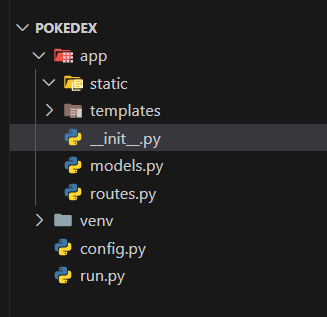

2. **Crear Archivos Base:**
   - Crea un archivo `run.py` en la raíz del proyecto que será el punto de entrada de la aplicación Flask:

   ```python
   from app import app

   if __name__ == '__main__':
       app.run(debug=True)
   ```

   - En `app/__init__.py`, inicializa la aplicación Flask y las configuraciones:

   ```python
   from flask import Flask

   app = Flask(__name__)

   from . import routes
   ```

Dentro de __init__.py, escribes `from . import routes` para asegurarte de que Flask conoce las rutas que has definido en routes.py. Esto importa el módulo routes que está en el mismo paquete (indicado por .) y asi acceder a todas las rutas como subpages que crees.



# Paso 4: Autenticación de Usuarios

## Estructura de la Aplicación con Templates y Archivos Estáticos

1. **Templates:**
   - En la carpeta `templates`, crea un archivo `base.html` que servirá como la plantilla base para todas las páginas:

   ```html
   <!DOCTYPE html>
   <html lang="en">
   <head>
       <meta charset="UTF-8">
       <meta name="viewport" content="width=device-width, initial-scale=1.0">
       <title>{% block title %}{% endblock %}</title>
   </head>
   <body>
       {% block body %}
       {% endblock %}
   </body>
   </html>
   ```

   - Crea otros archivos HTML según sea necesario, extendiendo `base.html`.
   Más adelante entenderemos bien como funciona `{% block body %}` y otros que se muestran, pero basicamente te permitirán manipular facilmente archivos html.

2. **Static Files:**
   - En la carpeta `static`, puedes almacenar CSS, JavaScript, y otros archivos estáticos que necesites para tu aplicación.



## Implementación de Registr





#### Implementación de Registro y Login

1. **Ruta de Registro:**
   - Crear una ruta `/register` que maneje tanto GET (para mostrar el formulario de registro) como POST (para procesar los datos del formulario).
   - Validar los datos del formulario, crear un nuevo usuario, encriptar la contraseña, y guardar el usuario en la base de datos.
   - Redirigir al usuario a la página de login después de un registro exitoso.

   ```python
  from flask import render_template, request, redirect, url_for, flash
  from flask_login import login_user
  from werkzeug.security import generate_password_hash
  from app import app, db
  from app.models import User

  @app.route('/register', methods=['GET', 'POST'])
  def register():
      if request.method == 'POST':
          username = request.form['username']
          email = request.form['email']
          password = request.form['password']

          # Verificar que el username o email no existan ya en la base de datos
          user_exists = User.query.filter((User.username == username) | (User.email == email)).first() is not None
          
          if user_exists:
              flash('El nombre de usuario o correo electrónico ya existe.')
              return redirect(url_for('register'))
          
          # Crear una nueva instancia de User
          new_user = User(
              username=username,
              email=email,
              password_hash=generate_password_hash(password, method='sha256')  # Encriptar la contraseña
          )

          # Agregar el nuevo usuario a la base de datos
          db.session.add(new_user)
          db.session.commit()

          flash('Registro exitoso. Por favor, inicia sesión.')
          return redirect(url_for('login'))
      
      return render_template('register.html')
   ```


El código HTML para el formulario de registro (register.html) debería contener campos para el username, email, y password

  ```html
    <form method="post" action="{{ url_for('register') }}">
    <label for="username">Nombre de usuario:</label>
    <input type="text" id="username" name="username" required>

    <label for="email">Correo electrónico:</label>
    <input type="email" id="email" name="email" required>

    <label for="password">Contraseña:</label>
    <input type="password" id="password" name="password" required>

    <input type="submit" value="Registrarse">
    </form>
  ```





#### Uso de Flask-Login para Manejar Sesiones

1. **Inicialización de Flask-Login:**
   - Configurar `LoginManager` y especificar la vista de login (como ya has hecho).

2. **Función de Carga de Usuario:**
   - Definir la función `load_user` que Flask-Login utilizará para cargar un usuario a partir de un ID de sesión.

3. **Proteger Rutas:**
   - Usar el decorador `@login_required` de Flask-Login para proteger las rutas que requieran autenticación.

#### Ejemplo de Código para Registro y Autenticación

```python
# En __init__.py o donde configures tu app y Flask-Login
from flask_login import LoginManager
login_manager = LoginManager()
login_manager.init_app(app)
login_manager.login_view = 'login'

# En models.py
from werkzeug.security import generate_password_hash

class User(UserMixin, db.Model):
    # tus campos de modelo aquí
    # ...

# En routes.py
from app.models import User
from werkzeug.security import generate_password_hash, check_password_hash

@app.route('/register', methods=['GET', 'POST'])
def register():
    if request.method == 'POST':
        # Lógica para procesar el formulario de registro y crear un nuevo usuario
        # ...
    return render_template('register.html')

@app.route('/login', methods=['GET', 'POST'])
def login():
    # Lógica para procesar el formulario de login
    # ...
```

## Implementación de Autenticación de Usuarios

1. **Configuración de Flask-Login:**
   - Instala Flask-Login para manejar sesiones de usuario:

   ```bash
   pip install flask-login
   ```

   - Configura Flask-Login en `app/__init__.py`:

   ```python
   from flask_login import LoginManager

   login_manager = LoginManager()
   login_manager.init_app(app)
   ```

  ```python
  from flask import Flask
  from flask_login import LoginManager

  # Crear la instancia de la aplicación Flask
  app = Flask(__name__)

  # Configurar Flask-Login para manejo de sesiones
  login_manager = LoginManager()
  login_manager.init_app(app)

  # Importar las rutas al final para evitar dependencias circulares
  from . import routes
  ```


2. **Modelo de Usuario:**
   - En `models.py`, define un modelo de usuario utilizando SQLAlchemy:

   ```python
   from . import db
   from flask_login import UserMixin

  # Atributos de la entidad Usuario
   class User(UserMixin, db.Model):
       id = db.Column(db.Integer, primary_key=True)
       username = db.Column(db.String(100), unique=True, nullable=False)
       password_hash = db.Column(db.String(100), nullable=False)
   ```

   Recuerdeme explicar esto mejor la porx clase :D



3. **Rutas de Autenticación:**
   - Define las rutas para registro, inicio de sesión, y cierre de sesión en `routes.py`.

   ```python
    from flask import render_template, request, flash, redirect, url_for
    from flask_login import login_user, current_user, logout_user
    from werkzeug.security import check_password_hash

   @app.route('/login', methods=['GET', 'POST'])
   def login():
       # Implementación de la lógica de inicio de sesión
       pass

   @app.route('/logout')
   def logout():
       logout_user()
       return redirect(url_for('index'))
   ```

   Esa fue la estructura básica, porque realmente luce asi:

    ```python
    from flask import render_template, request, flash, redirect, url_for
    from flask_login import login_user, current_user, logout_user
    from werkzeug.security import check_password_hash
    from app import app, db
    from app.models import User
    from app import login_manager

    @login_manager.user_loader
    def load_user(user_id):
        return User.query.get(int(user_id))

    @app.route('/login', methods=['GET', 'POST'])
    def login():
        # Si el usuario ya está autenticado, redirigir a la página principal
        if current_user.is_authenticated:
            return redirect(url_for('index'))

        # Manejar la solicitud POST
        if request.method == 'POST':
            username = request.form.get('username')
            password = request.form.get('password')
            user = User.query.filter_by(username=username).first()
            
            # Verificar si el usuario existe y la contraseña es correcta
            if user and check_password_hash(user.password_hash, password):
                login_user(user, remember=request.form.get('remember'))  
                next_page = request.args.get('next')
                return redirect(next_page or url_for('index'))
            else:
                flash('Credenciales inválidas. Por favor intente de nuevo.')

        # Mostrar el formulario de inicio de sesión para una solicitud GET
        return render_template('login.html')

    @app.route('/logout')
    def logout():
        logout_user()
        return redirect(url_for('index'))
        
    ```

  Recordemos que el `from app import login_manager` lo tenemos instanciado en el __init__.py

  Tal vez tengas muchas preguntas, trata de leerlo con detenimiento y si no entiendes, lo resolvemos en clase